In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


/tmp/ipython-input-3820603907.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price            Close  Prediction
Ticker            AAPL            
Date                              
2024-11-08  226.157166  254.367020
2024-11-11  223.436813  257.286652
2024-11-12  223.436813  258.103729
2024-11-13  224.323654  254.685867
2024-11-14  227.412704  251.307861
Price       Ticker
Close       AAPL      0
Prediction            0
dtype: int64
0
MSE: 71.94013372528677


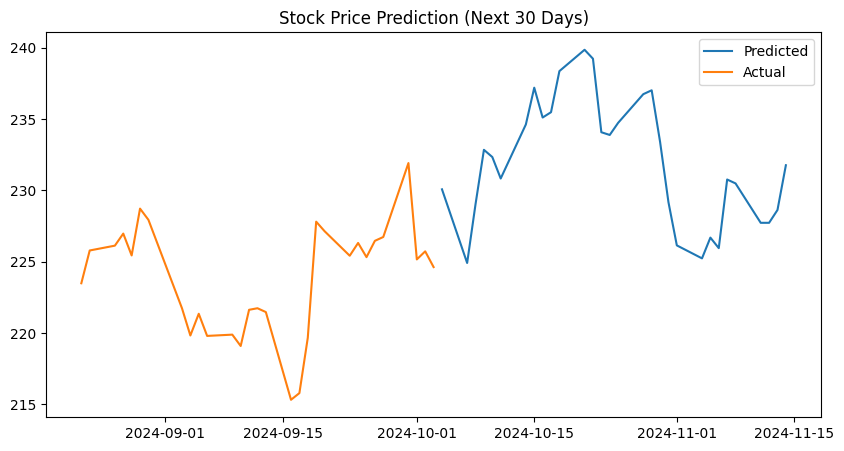

In [4]:
data = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
data = data[['Close']]
data['Prediction'] = data['Close'].shift(-30)  # predict 30 days into future
data.dropna(inplace=True) # Remove rows with NaN values after shifting
print(data.tail()) # Print tail of dataframe to check for NaNs
print(data.isnull().sum()) # Print count of NaNs per column


X = np.array(data.drop(['Prediction'], axis=1))
y = np.array(data['Prediction'])
print(np.isnan(y).sum()) # Print count of NaNs in y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
X_future = np.array(data.drop(['Prediction'], axis=1))[-30:]
forecast = model.predict(X_future)
forecast_index = data.index[-30:]
plt.figure(figsize=(10, 5))
plt.plot(forecast_index, forecast, label='Predicted')
plt.plot(data.index[-60:-30], data['Close'][-60:-30], label='Actual')
plt.legend()
plt.title('Stock Price Prediction (Next 30 Days)')
plt.show()